In [1]:
import os
import glob
import numpy as np
from platform import system as OS
import pandas as pd
import scipy.stats
import math
import gc
import matplotlib
import matplotlib.cm as cm
import datetime
from copy import deepcopy
from IPython.display import clear_output, display, HTML, Image
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")
import sys
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import mlab
from mpl_toolkits.mplot3d import Axes3D


root='/data'
pathToPic="/home/david/Mostafa/PhD/FENS2018/"

ThisNoteBookPath=os.path.dirname(os.path.realpath("__file__"))
CommunNoteBookesPath=os.path.join(os.path.split(ThisNoteBookPath)[0],"load_preprocess_rat")
CWD=os.getcwd()
os.chdir(CommunNoteBookesPath)   
%run Animal_Tags.ipynb
%run BatchRatBehavior.ipynb
%run plotRat_documentation_3_KinematicsInvestigation.ipynb
%run plotRat_documentation_1_GeneralBehavior.ipynb
%run loadRat_documentation.ipynb
%run Animal_Tags.ipynb
%run RunBatchRat_3_CompareGroups.ipynb
os.chdir(CWD)

defaultParam={
    "binSize":0.25,
    "trialOffset":20., #max end of trial, in seconds (position will be cutted)
    "sigmaSmoothPosition":0.1,  #smooth the position
    #"sigmaSmoothPosition":0.33 for pavel dataType
    "sigmaSmoothSpeed":0.3, #smooth the speed
    "positionDiffRange": [2.,5.], #min and max differences allowed between two consecutive positions
                                  #min to correct start, max to correct jumps
    "pawFrequencyRange":[2.,10.],
    "startAnalysisParams":[10,0.2,0.5],
    "cameraToTreadmillDelay":2., #seconds, usual time between camera start and treadmill start
    "nbJumpMax" : 100., #if jumps>nbJumpMax, trial is badly tracked
    
    #parameter to detect end of trial (first position minima)
    "endTrial_backPos":55,  # minima is after the animal went once to the back (after first time position>backPos)
    "endTrial_frontPos":30, # minima's position is in front of treadmill (position[end]<frontPos)
    "endTrial_minTimeSec":4, # minima is after minTimeSec seconds (time[end]>minTimeSec)
    }
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

print("Finished!")

def _save(name='tst'):
    plt.savefig(pathToPic+name+'.svg', format='svg')

Finished!


#### single session data Rat106

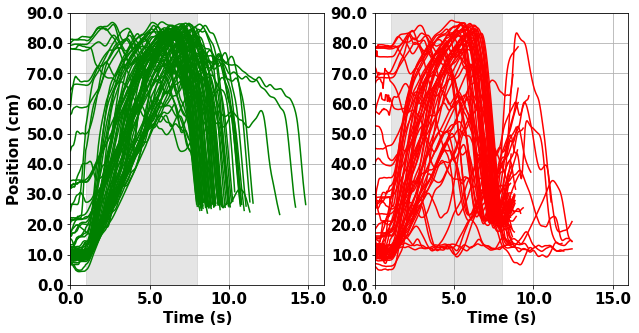

In [73]:
session='Rat106_2017_06_13_09_56'
session='Rat10`6_2017_06_14_10_10'
session='Rat106_2017_08_22_09_17'
data=Data(root,session[:6],session,redoPreprocess=False)
data.position_correction()
onlyGood=False
plt.figure(figsize=(10,5))
posDict=data.position
time=data.rawTime #align on camera
goodAx=plt.subplot(121)
badAx =plt.subplot(122)
for trial in posDict:
    ax=goodAx
    color="green"
    if trial not in data.goodTrials:
        color="red"
        ax=badAx

    ax.plot(time[trial][:data.stopFrame[trial]],posDict[trial][:data.stopFrame[trial]],color=color)

for i in [goodAx,badAx]:
    plt.sca(i)
    plt.xlim([0,16])
    plt.ylim([0,90])
    plt.grid()
#     plt.ylabel("Position (cm)",fontsize=10,weight='bold')
    plt.xlabel("Time (s)",fontsize=15,weight='bold')
    i.set_xticklabels(i.get_xticks(), weight='bold')
    i.set_yticklabels(i.get_yticks(), weight='bold')
    plt.axvspan(data.cameraToTreadmillDelay,data.cameraToTreadmillDelay+np.median(data.goalTime),alpha=0.2,color="grey")
# plt.savefig("/home/david/Mostafa/PhD/PhdDays2017/Poster/%s.png"%session)
goodAx.set_ylabel("Position (cm)",fontsize=15,weight='bold')
_save("Rat106D141")
plt.show()

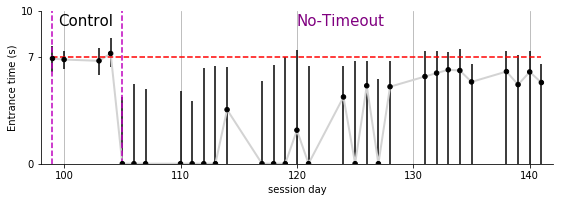

In [98]:
AnimalProfile={'Type':'Good',
     'rewardType':'Progressive',
     'initialSpeed':['10'],
     'Speed':'10',
     'Tag':['RandomSpeed-BackTo10','Control-Late-NoTimeout']
              }


plot_learningCurves(root,'Rat106',PerfParamToPlot=['percentile entrance time'],profile=AnimalProfile,
                    stop_date='2017_07_21',parameter=defaultParam,redoPreprocess=False,
                    redoStat=False,override=False,plot=True,PrintWarning=False);

ax=plt.gca()
ax.set_title("")
plt.gcf().suptitle("")
ax.set_ylim([0,10])
ax.set_yticks([0,7,10])
ax.text(99.5,9,'Control',fontdict=font,color='k')
ax.text(120,9,'No-Timeout',fontdict=font,color='purple')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Entrance time (s)")
# plt.gcf().savefig("/home/david/Mostafa/PhD/FENS2018/rat106ctrl_not.svg",format='svg')

Entrance time distrbution

In [168]:
AnimalProfile={'Type':'Good',
     'rewardType':'Progressive',
     'initialSpeed':['10'],
     'Speed':['10'],
     'Tag':'Control'
              }
SESSION_LIMIT=-5

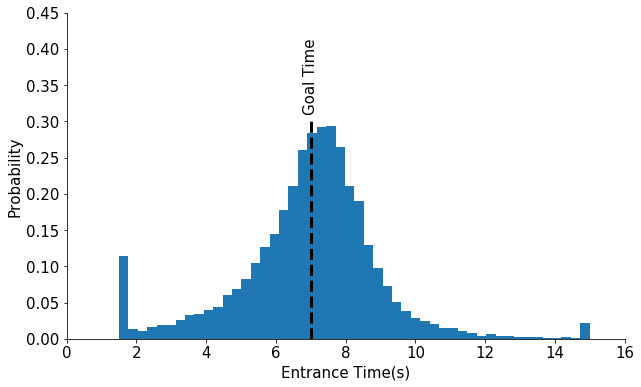

In [169]:
animalList=batch_get_animal_list(root,AnimalProfile)
# animalList=['Rat121']
et=[]
for animal in  animalList:
    sessionDict=batch_get_session_list(root,[animal],profile=AnimalProfile)
    if SESSION_LIMIT >0:
        tmp=sorted(sessionDict['Sessions'])[:SESSION_LIMIT]
    else:
        tmp=sorted(sessionDict['Sessions'])[SESSION_LIMIT:]
    
    for session in tmp:
        picklePath=os.path.join(root,animal,'Experiments',session,'Analysis','preprocesseddata_binsize250ms_.p')
        with open(picklePath,'rb') as f:
            data=pickle.load(f)
        et.extend(data['entranceTime'])
et=np.array(et)
ax=plt.figure(figsize=(10,6)).add_subplot(111)
ax.hist(et[et>1.4],50,density=True);
ax.set_xlabel('Entrance Time(s)')
ax.set_ylabel('Probability')
ax.vlines(7,0,.305,color='k',linestyles='dashed',linewidth=3)
ax.text(7, .31, "Goal Time", rotation=90, va='bottom',ha='center')
ax.set_ylim([0,.45])
ax.set_xlim([0,16])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# _save('ET_pro')

learning curve

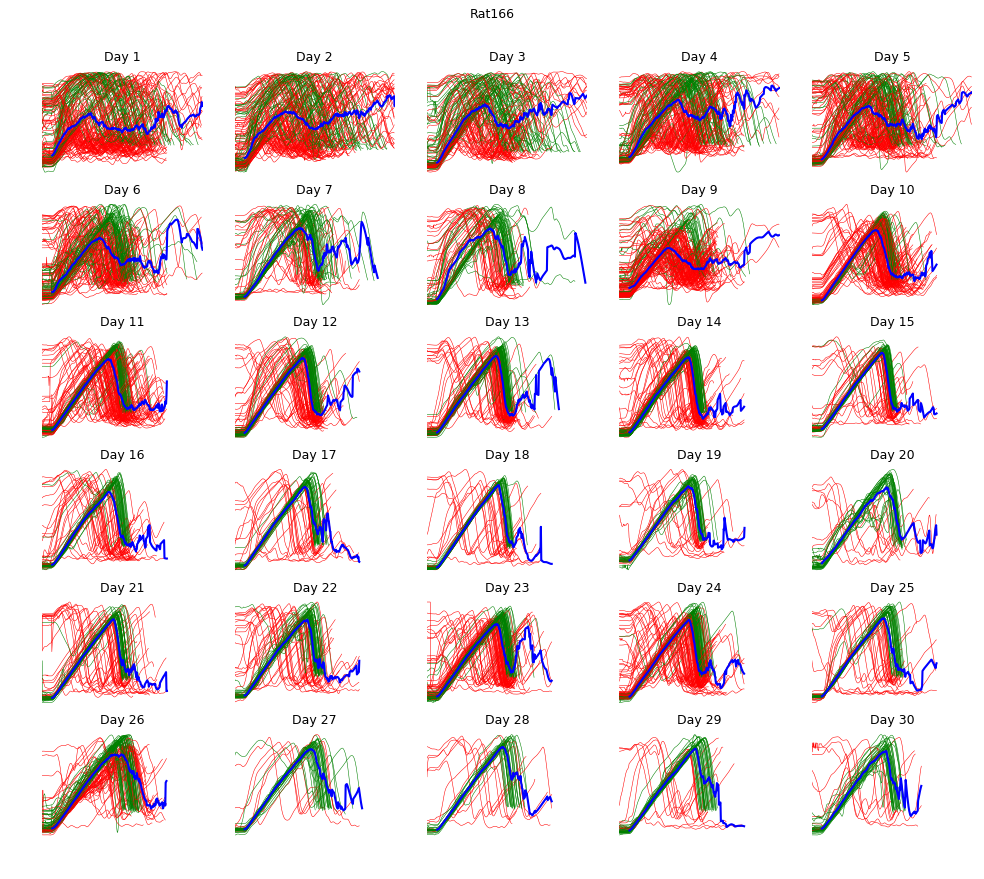

In [85]:
def plot_batch_traj(root='/data', axes=None, columnNb=5, animal='Rat166', profile={}, stop_date=''):
    if type(animal) != str:
        raise("enter the name of a single animal")
        
    sessionList=batch_get_session_list(root,animalList=[animal],profile=profile,until_date=stop_date)['Sessions'][:30]
    if sessionList:
        rowNb=(len(sessionList)//columnNb) +1
        if axes is None:
            fig=plt.figure(figsize=(16,16),dpi=75,tight_layout=False)
            fig.suptitle(animal,y=.93)
            axes=[fig.add_subplot(rowNb,columnNb,i+1) for i,_ in enumerate(sessionList)]
    for i,session in enumerate(sessionList):
        data=Data(root,session[:6],session,redoPreprocess=False)
        data.position_correction()
        ax=axes[i]
        try:
            plot_positions(data,onlyGood=False,raw=False,vSpan=False,axis=ax,linewidth=.5)
            ax.set_title('Day '+str(i+1))
            ax.set_axis_off()
        except Exception as e:
            print(repr(e))            

    return sessionList

if "__file__" not in dir():
    AnimalProfile={'Type':'Good',
     'rewardType':'Progressive',
     'initialSpeed':'10',
     'Speed':'10',
     'Tag':['Control']
                  }
    animal="Rat166"
    ColumnNb=5
    a=plot_batch_traj(root='/data', columnNb=ColumnNb, animal=animal, profile=AnimalProfile, stop_date='')
#     _save('learning_curve')

### single session 

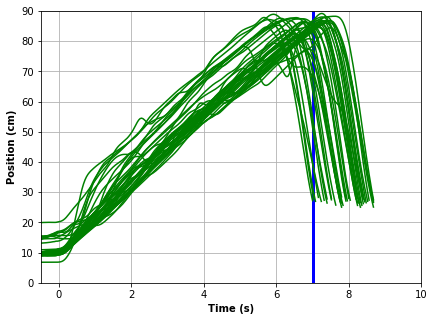

In [30]:
session='Rat166_2017_11_09_10_17'
data=Data(root,session[:6],session,redoPreprocess=False)
data.position_correction()
onlyGood=False
plt.figure(figsize=(15,5))
posDict=data.position
time=data.rawTime #align on camera
goodAx=plt.subplot(121)
# badAx =plt.subplot(122)
for trial in posDict:
    ax=goodAx
    color="green"
    if trial not in data.goodTrials:
        continue

    ax.plot(time[trial][:data.stopFrame[trial]]-1,posDict[trial][:data.stopFrame[trial]],color=color)

# plt.sca(i)
plt.xlim([-.5,10])
plt.ylim([0,90])
plt.grid()
plt.ylabel("Position (cm)",fontsize=10,weight='bold')
plt.xlabel("Time (s)",fontsize=10,weight='bold')
i.set_xticklabels(i.get_xticks(), weight='bold')
i.set_yticklabels(i.get_yticks(), weight='bold')
plt.vlines(7,0,90,linewidth=3,color="b")


# plt.savefig("/home/david/Mostafa/PhD/PhdDays2017/Poster/%s.png"%session)
# _save("Rat106D141")
plt.show()

probablity distribution of correct trials along the length of the treadmill

In [31]:
AnimalProfile={'Type':'Good',
     'rewardType':'Progressive',
     'initialSpeed':'10',
     'Speed':['10'],
     'Tag':'Control'
              }
SESSION_LIMIT=-5
BINS=[0,10,20,30,40,50,60,70,80,90]

removed sessions: 0
good trials: 1314
session limit: 1


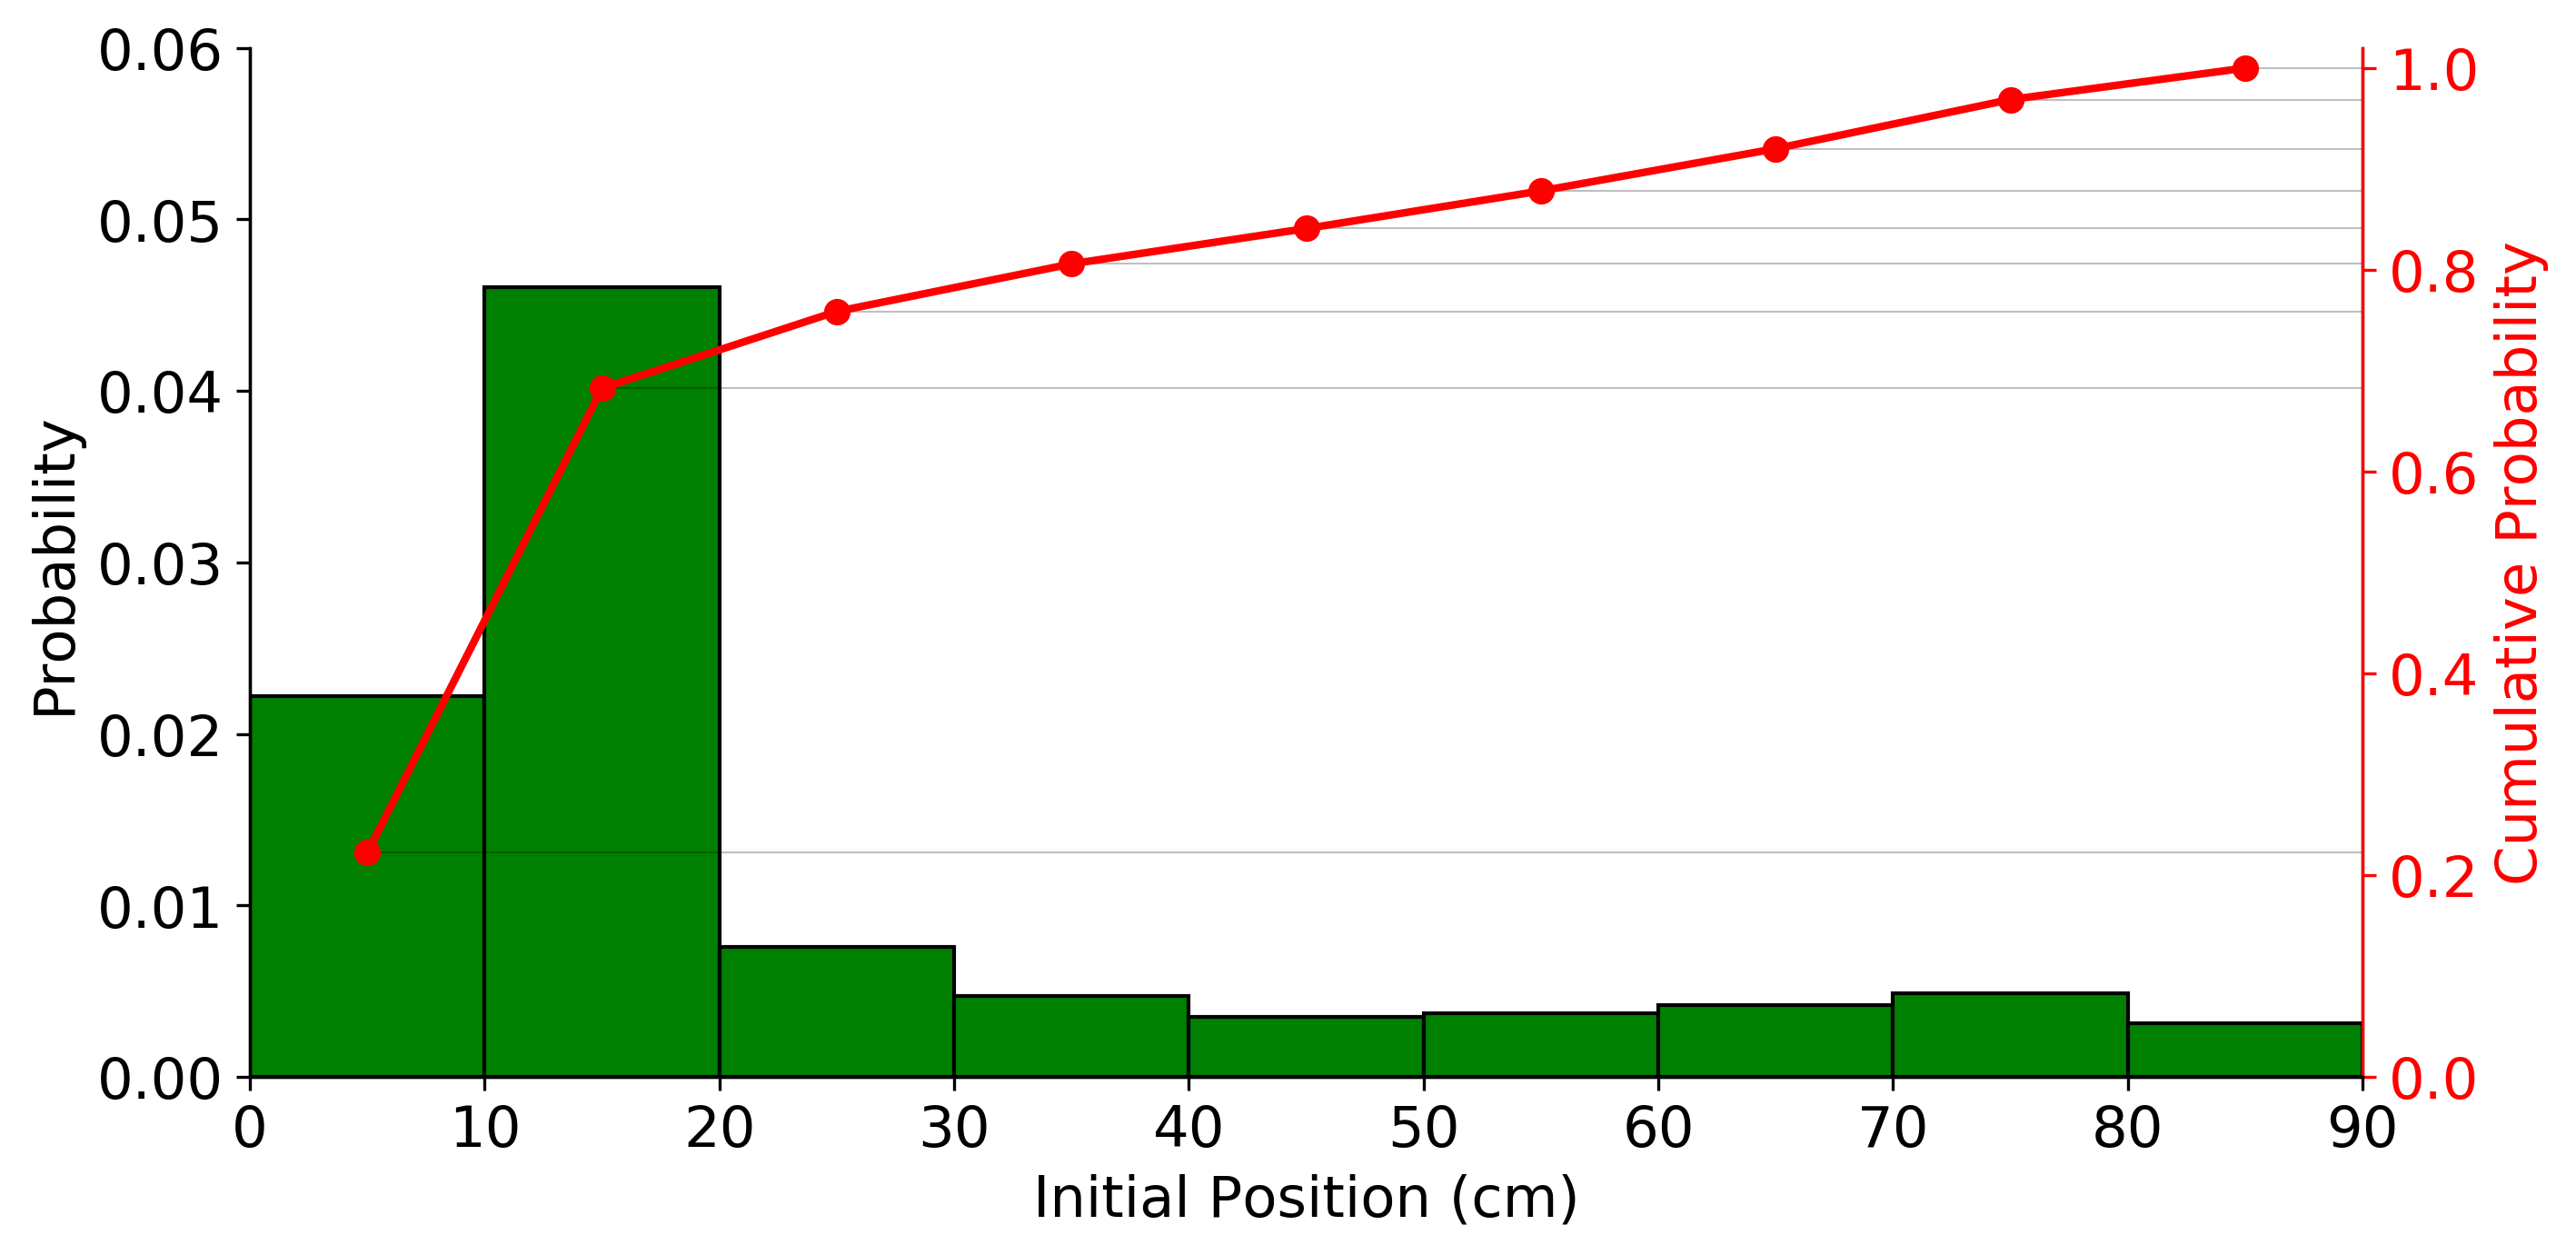

In [92]:
animalList=batch_get_animal_list(root,AnimalProfile)
# animalList=['Rat084']
rawPos=[]
countN=0
countP=0
for animal in  animalList:
    sessionDict=batch_get_session_list(root,[animal],profile=AnimalProfile)
    if SESSION_LIMIT >0:
        tmp=sorted(sessionDict['Sessions'])[:SESSION_LIMIT]
    else:
        tmp=sorted(sessionDict['Sessions'])[SESSION_LIMIT:]
    for session in tmp:
        data=Data(root,session[:6],session,redoPreprocess=False)
        try:
            rawPos0=np.array([data.position[i][0] for i in data.position])
            ET0=np.array(data.entranceTime)
        except:
            ET0=[]
            rawPos0=[0,0]
        if len(ET0)==len(rawPos0):
            rawPos0=rawPos0[np.logical_and(ET0 >= np.median(data.goalTime), ET0 < np.median(data.maxTrialDuration))]
            rawPos.extend(rawPos0)
            countP+=len(rawPos0)
        else:
            countN+=1

print('removed sessions:',countN)
print('good trials:',countP)
print('session limit:',SESSION_LIMIT)
rawPos=np.array(rawPos)
fig=plt.figure(figsize=(10,5),dpi=300)
ax=fig.add_subplot(111)
ax.hist(rawPos,BINS,density=True,edgecolor='k',color='g')
n,_,_=plt.hist(rawPos,BINS,density=True,cumulative=True,alpha=0)
plt.xlabel('Initial Position (cm)')
plt.ylabel('Probability')
# plt.title('P(initial position|correct trial)')
plt.ylim(0,.06)
plt.xlim([BINS[0],BINS[-1]])
ax.spines['top'].set_visible(False)

ax2=ax.twinx()
X=np.array(BINS[1:])-5
ax2.plot(X,n,linewidth=2,color='r',marker='o')
ax2.spines['top'].set_visible(False)
ax2.set_ylim([0,1.02])
ax2.spines['right'].set_color('r')
ax2.tick_params(axis='y', colors='red')
for i,x in zip(n,X): ax2.hlines(y=i,xmin=x,xmax=BINS[-1],alpha=.25,linewidth=.5,color='k')
ax2.set_ylabel('Cumulative Probability',color='r');
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# _save('P_initial_correct')

GPi effect

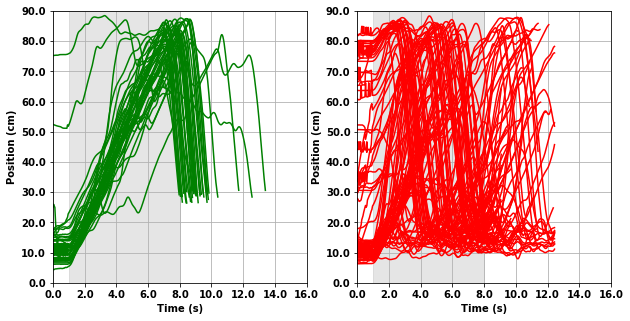

In [99]:
session='Rat121_2017_11_01_14_44'
session='Rat121_2017_11_13_16_21'
data=Data(root,session[:6],session,redoPreprocess=False)
onlyGood=False
plt.figure(figsize=(10,5))
posDict=data.position
time=data.rawTime #align on camera
goodAx=plt.subplot(121)
badAx =plt.subplot(122)
for trial in posDict:
    ax=goodAx
    color="green"
    if trial not in data.goodTrials:
        color="red"
        ax=badAx

    ax.plot(time[trial][:data.stopFrame[trial]],posDict[trial][:data.stopFrame[trial]],color=color)

for i in [goodAx,badAx]:
    plt.sca(i)
    plt.xlim([0,16])
    plt.ylim([0,90])
    plt.grid()
    plt.ylabel("Position (cm)",fontsize=10,weight='bold')
    plt.xlabel("Time (s)",fontsize=10,weight='bold')
    i.set_xticklabels(i.get_xticks(), weight='bold')
    i.set_yticklabels(i.get_yticks(), weight='bold')
    plt.axvspan(data.cameraToTreadmillDelay,data.cameraToTreadmillDelay+np.median(data.goalTime),alpha=0.2,color="grey")
# plt.savefig("/home/david/Mostafa/PhD/PhdDays2017/Poster/%s.png"%session)
plt.show()

### group comparison

In [3]:
#modules to find path of all sessions
import glob
import os
import numpy as np
from IPython.display import clear_output, display, HTML
import matplotlib.cm as cm
import warnings
from platform import system as OS
import time
import pickle
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
#run other notebooks
if "__file__" not in dir():
    
    ThisNoteBookPath=os.path.dirname(os.path.realpath("__file__"))
    CommunNoteBookesPath=os.path.join(os.path.split(ThisNoteBookPath)[0],'load_preprocess_rat')
    CWD=os.getcwd()
    os.chdir(CommunNoteBookesPath)   
    %run Animal_Tags.ipynb
    %run BatchRatBehavior.ipynb
    %run plotRat_documentation_3_KinematicsInvestigation.ipynb
    %run plotRat_documentation_1_GeneralBehavior.ipynb
    %run loadRat_documentation.ipynb
    %run RunBatchRat_3_CompareGroups.ipynb
    %run UtilityTools.ipynb

    
    os.chdir(CWD)
    
    if platform.system()=='Linux':
        root="/data"
    elif platform.system()=='Windows':
        root="C:\\DATA\\"
    else:
        root="/Users/davidrobbe/Documents/Data/"

    # PARAMETERS (will be used if 1. no pickles and 2. no param files (old data))
    param={
        "goalTime":7,#needed for pavel data only
        "treadmillRange":[0,90],#pavel error conversion "treadmillRange":[0,80]
        "maxTrialDuration":20,
        "interTrialDuration":10,#None pavel
        "endTrial_frontPos":30,
        "endTrial_backPos":55, 
        "endTrial_minTimeSec":4,
        "cameraSamplingRate":25, #needed for new setup    

        "sigmaSmoothPosition":0.1,#0.33, 0.18 pavel
        "sigmaSmoothSpeed":0.3,#0.3, 0.5 pavel
         "nbJumpMax":100,#200 pavel
        "binSize":0.25
    }
    print('os:',OS(),'\nroot:',root,'\nImport successful!')

os: Linux 
root: /data 
Import successful!


In [4]:
def plot_mean_animals(root,groups,axes=None,n_iteration=1e3,parameter={},redo=False,stop_dayPlot=0,TaskParamToPlot=[],fullLegend=False,**kargs):
    #divide input dictionary
    colorMapGroup={key: groups[key][0] for key in groups}
    colorGroup={key: groups[key][1] for key in groups}
    animalGroup={key: groups[key][2] for key in groups}
    experimentalGroup={key: groups[key][3] for key in groups}
    NbAnimal=len(groups["group2"][2]) #number of animals to be chosen from the first group
    
    allResults={key:{} for key in TaskParamToPlot}
    nSessionMax={}

    if fullLegend:
        ncols=3
    else: ncols=1
    
    # get the data for all the groups
    
    ALLobj=sample_size_control(get_rat_group_statistic,animalList=animalGroup['group1'],NbAnimal=NbAnimal,n=n_iteration,
                               root=root,profile=experimentalGroup['group1'],parameter=parameter,redo=redo,
                               stop_dayPlot=stop_dayPlot,TaskParamToPlot=TaskParamToPlot);
    ALL=ALLobj.Results;
    
    nIterMax=[ALL[i][1] for i,_ in enumerate(ALL)]
    nSessionMax['group1']=max(nIterMax)
    for key in TaskParamToPlot:
        results={i:np.mean(np.asarray(list(ALL[i][0][key].values())),axis=0) for i,_ in enumerate(ALL) 
                 if nIterMax[i]>=nSessionMax['group1']}
        allResults[key]['group1']=results
        ALLobj.iterN=len(results.keys())
    

    results,nSessionMax['group2']=get_rat_group_statistic(root,animalList=animalGroup['group2'],profile=experimentalGroup['group2'],parameter=parameter,
                                                        redo=redo,stop_dayPlot=stop_dayPlot,TaskParamToPlot=TaskParamToPlot)
    for key in TaskParamToPlot:
        allResults[key]['group2']=results[key]

        
    #PLOTTING    
    if axes is None:
        nbCol=2
        nbLine=len(allResults)//nbCol+len(allResults)%nbCol
        nbLine+=1
        axes=[]
        fig=plt.figure(figsize=(12, nbLine*4))
        for index in range(len(TaskParamToPlot)):
            axes.append(fig.add_subplot(nbLine,nbCol,index+1))

    colors={}
    for group in animalGroup:
        colors[group]  =colorMapGroup[group](np.linspace(0, 1, len(animalGroup[group])+3))
        colors[group]  =colors[group][3:]
        
    for index,key in enumerate(TaskParamToPlot):
        if key=="treadmillSpeed":continue
        ax=axes[index]
        for group in allResults[key]:
            xaxis=np.arange(1,nSessionMax[group]+1,1)
            yaxis=np.array(list(allResults[key][group].values()),ndmin=2)
            plot_one_key(xaxis,yaxis,animalGroup[group],experimentalGroup[group]['Tag'][0],
                         colors[group],color=colorGroup[group],axes=ax,fullLegend=fullLegend)
        
        
#         ax.set_xlabel("Session",fontsize=14)
        ax.set_ylabel(key,fontsize=14)
#         ax.set_title(key,fontsize=14)
        ax.set_xlim([0,max(list(nSessionMax.values()))])
        ax.tick_params(axis='both', which='major', labelsize=12)
        if key=="median entrance time (sec)":
            ax.set_ylim([0,10])
            ax.axhline(7,color="b",ls="--")
            ax.set_ylabel("Entrance time (s)")
        elif key=="mean entrance time (sec)":
            ax.set_ylim([0,10])
            ax.axhline(7,color="b",ls="--")
        elif key=="% good trials":
            ax.set_ylim([0,80])
        elif key=="standard deviation of entrance time":
            ax.set_ylabel("STD entrance time (s)")
            ax.set_ylim([0,8])
        elif key=="Tortuosity":pass
            #ax.set_ylim([2,10])
        elif key=="percentile entrance time":
            ax.set_ylim([0,15])
        elif key=="% good trials on last 40":
            ax.axhline(72.5,color="b",ls="--")
            ax.set_ylim([0,100])
        elif key=="Trajectory Correlation":
            ax.set_ylim([-.1,0.75])
        elif key=="Forward Speed Vs TreadmillSpeed":
            ax.set_ylim([0,4])
            ax.set_ylabel('Forward Speed Ratio')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        try:
            ax.set(**kargs)
        except:pass

    axes[0].legend(bbox_to_anchor=(0.5, 1.2), loc=9, borderaxespad=0.,ncol=ncols)
#     plt.tight_layout()            
    plt.subplots_adjust(top=0.90)
    return allResults,colors,colorGroup,ALLobj

def plot_one_key(xaxis,keyResult,animalList,experimentalGroup,colorList,color="blue",axes=None,fullLegend=False):
    Label=experimentalGroup
    #compute mean
#         keyRes=np.asarray(list(keyResult.values()))
    meanKeyRes=np.nanmedian(keyResult,axis=0)
    stdKeyRes=np.nanstd(keyResult,axis=0)
            
    #plot mean
    if experimentalGroup != 'Control':
        Label=experimentalGroup+f', n={keyResult.shape[0]}'
    else:
        Label=experimentalGroup
    axes.plot(xaxis,meanKeyRes,color=color,lw=3,marker='.',markersize=20,label=Label)
    if not fullLegend:
        axes.fill_between(xaxis,(meanKeyRes - stdKeyRes),(meanKeyRes + stdKeyRes),color=color,alpha=0.25)


In [15]:
if "__file__" not in dir():

    profile1={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Control']
             }
    profile2={'Type':'Good',
             'rewardType':'Progressive',
#              'initialSpeed':'10',
#              'Speed':'10',
             'Tag':['ImmobileTreadmill']
             }
    animalList1=batch_get_animal_list(root,profile1)
    animalList2=batch_get_animal_list(root,profile2)
    ## ok late DLS Histo
    #animalList2= ['Rat118', 'Rat119', 'Rat133', 'Rat134']

    groups={
        "group1":(cm.Greys,"black",animalList1,profile1),
        "group2":(cm.Purples ,"purple"  ,animalList2,profile2),
        }

    print("animal lists:\n",animalList1,'\n',animalList2)    
    
    
    TaskParamToPlot=["% good trials","median entrance time (sec)",
                     "standard deviation of entrance time","Trajectory Correlation"]
    n_iteration=1e3
    stop_dayPlot =30
    fullLegend=False
    fig=plt.figure(figsize=(10,18))
    axes=[]
    for i in range(4):
        axes.append(fig.add_subplot(4,1,i+1))
    
    a=plot_mean_animals(root,groups,axes=axes,n_iteration=n_iteration,
                        parameter={},redo=False,stop_dayPlot=stop_dayPlot,TaskParamToPlot=TaskParamToPlot,fullLegend=False,title='')
    print("number of removed subsets: ",n_iteration-a[3].iterN)
    axes[0].legend(['Control', f'Immobile Treadmill, n={len(animalList2)}'],bbox_to_anchor=(0.5, 1.2), loc=9, borderaxespad=0,ncol=1)
    fig.savefig("/home/david/Mostafa/PhD/FENS2018/ctrl_imm.svg",format='svg')

animal lists:
 ['Rat077', 'Rat078', 'Rat084', 'Rat085', 'Rat088', 'Rat091', 'Rat095', 'Rat096', 'Rat098', 'Rat103', 'Rat104', 'Rat110', 'Rat113', 'Rat120', 'Rat137', 'Rat138', 'Rat139', 'Rat140', 'Rat149', 'Rat150', 'Rat151', 'Rat152', 'Rat161', 'Rat162', 'Rat163', 'Rat164', 'Rat165', 'Rat166', 'Rat215', 'Rat216', 'Rat217', 'Rat218', 'Rat219', 'Rat220', 'Rat221', 'Rat222', 'Rat223', 'Rat224', 'Rat225', 'Rat226', 'Rat227', 'Rat228', 'Rat229', 'Rat230', 'Rat232', 'Rat246', 'Rat247', 'Rat248', 'Rat249', 'Rat250', 'Rat251', 'Rat252', 'Rat253', 'Rat254', 'Rat255', 'Rat256', 'Rat257', 'Rat258', 'Rat259', 'Rat260', 'Rat261', 'Rat262', 'Rat263', 'Rat264', 'Rat265'] 
 ['Rat121', 'Rat122', 'Rat123', 'Rat124', 'Rat131', 'Rat132']
Estimated time to run sample size control<4.468320985324681s
NameError('Rat124 :pickle not complete, computing again...',)
number of removed subsets:  14.0


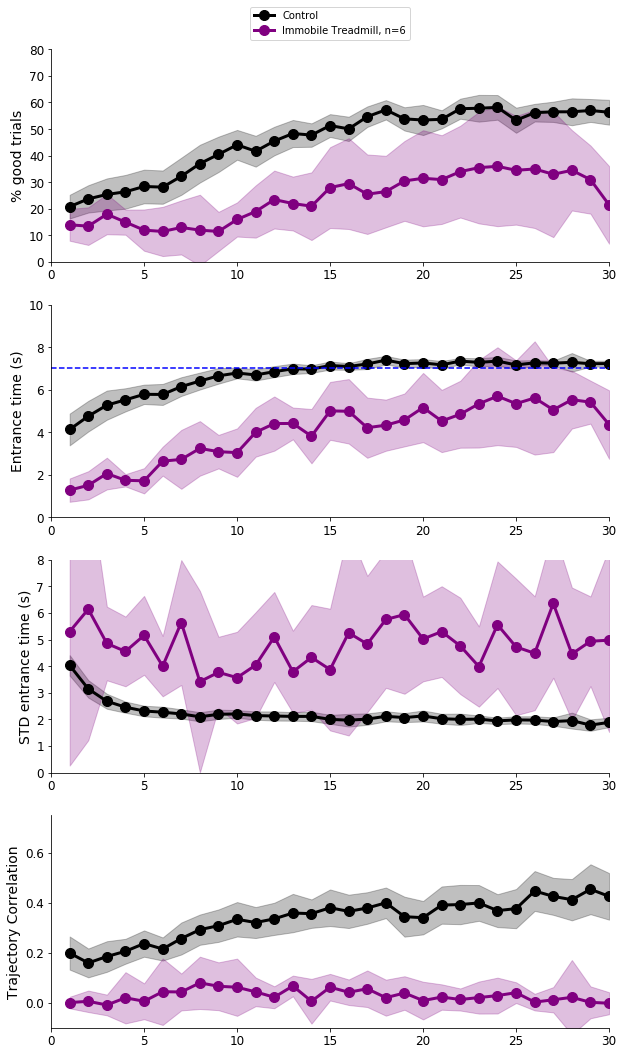

In [16]:
fig

animal lists:
 ['Rat077', 'Rat078', 'Rat084', 'Rat085', 'Rat088', 'Rat091', 'Rat095', 'Rat096', 'Rat098', 'Rat103', 'Rat104', 'Rat110', 'Rat113', 'Rat120', 'Rat137', 'Rat138', 'Rat139', 'Rat140', 'Rat149', 'Rat150', 'Rat151', 'Rat152', 'Rat161', 'Rat162', 'Rat163', 'Rat164', 'Rat165', 'Rat166', 'Rat215', 'Rat216', 'Rat217', 'Rat218', 'Rat219', 'Rat220', 'Rat221', 'Rat222', 'Rat223', 'Rat224', 'Rat225', 'Rat226', 'Rat227', 'Rat228', 'Rat229', 'Rat230', 'Rat232', 'Rat246', 'Rat247', 'Rat248', 'Rat249', 'Rat250', 'Rat251', 'Rat252', 'Rat253', 'Rat254', 'Rat255', 'Rat256', 'Rat257', 'Rat258', 'Rat259', 'Rat260', 'Rat261', 'Rat262', 'Rat263', 'Rat264', 'Rat265'] 
 ['Rat141', 'Rat142', 'Rat143', 'Rat144', 'Rat155', 'Rat156', 'Rat157', 'Rat158']
Estimated time to run sample size control<5.030230968259275s
number of removed subsets:  3.0


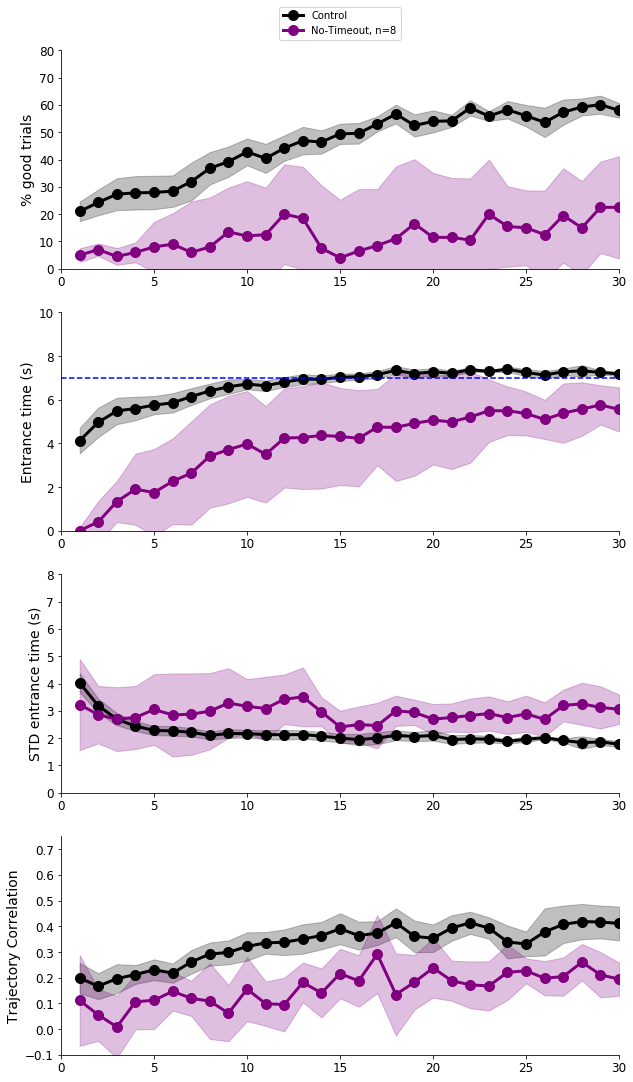

In [12]:
if "__file__" not in dir():

    profile1={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Control']
             }
    profile2={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Control-NoTimeout']
             }
    animalList1=batch_get_animal_list(root,profile1)
    animalList2=batch_get_animal_list(root,profile2)
    ## ok late DLS Histo
    #animalList2= ['Rat118', 'Rat119', 'Rat133', 'Rat134']

    groups={
        "group1":(cm.Greys,"black",animalList1,profile1),
        "group2":(cm.Purples ,"purple"  ,animalList2,profile2),
        }

    print("animal lists:\n",animalList1,'\n',animalList2)    
    
    
    TaskParamToPlot=["% good trials","median entrance time (sec)",
                     "standard deviation of entrance time","Trajectory Correlation"]
    n_iteration=1e3
    stop_dayPlot =30
    fullLegend=False
    fig=plt.figure(figsize=(10,18))
    axes=[]
    for i in range(4):
        axes.append(fig.add_subplot(4,1,i+1))
    
    a=plot_mean_animals(root,groups,axes=axes,n_iteration=n_iteration,
                        parameter={},redo=False,stop_dayPlot=stop_dayPlot,TaskParamToPlot=TaskParamToPlot,fullLegend=False,title='')
    print("number of removed subsets: ",n_iteration-a[3].iterN)
    axes[0].legend(['Control', f'No-Timeout, n={len(animalList2)}'],bbox_to_anchor=(0.5, 1.2), loc=9, borderaxespad=0,ncol=1)
#     fig.savefig("/home/david/Mostafa/PhD/FENS2018/ctrl_NTO.svg",format='svg')

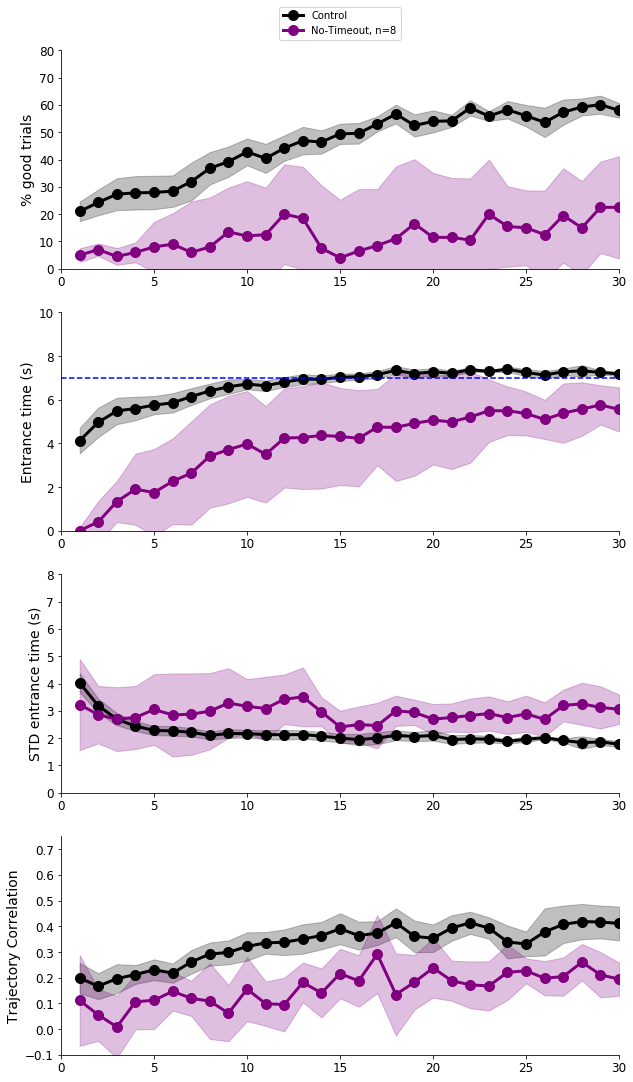

In [13]:
fig

In [10]:
if "__file__" not in dir():

    profile1={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Control']
             }
    profile2={'Type':'Good',
             'rewardType':'Progressive',
#              'initialSpeed':'10',
#              'Speed':'10',
             'Tag':['Control-Early-var']
             }
    animalList1=batch_get_animal_list(root,profile1)
    animalList2=batch_get_animal_list(root,profile2)
    #animalList1=[ 'Rat085', 'Rat095']
    ## ok late DLS Histo
    #animalList2= ['Rat118', 'Rat119', 'Rat133', 'Rat134']

    groups={
        "group1":(cm.Greys,"black",animalList1,profile1),
        "group2":(cm.Purples ,"purple"  ,animalList2,profile2),
        }

    print("animal lists:\n",animalList1,'\n',animalList2)    
    
    
    TaskParamToPlot=["% good trials","median entrance time (sec)",
                     "standard deviation of entrance time","Trajectory Correlation"]
    n_iteration=1e3
    stop_dayPlot =30
    fullLegend=False
    fig=plt.figure(figsize=(10,18))
    axes=[]
    for i in range(4):
        axes.append(fig.add_subplot(4,1,i+1))
    
    a=plot_mean_animals(root,groups,axes=axes,n_iteration=n_iteration,
                        parameter={},redo=False,stop_dayPlot=stop_dayPlot,TaskParamToPlot=TaskParamToPlot,fullLegend=False,title='')
    print("number of removed subsets: ",n_iteration-a[3].iterN)
    axes[0].legend(['Control', f'Variable Speed, n={len(animalList2)}'],bbox_to_anchor=(0.5, 1.2), loc=9, borderaxespad=0,ncol=1)
#     fig.savefig("/home/david/Mostafa/PhD/FENS2018/ctrl_var.svg",format='svg')

animal lists:
 ['Rat077', 'Rat078', 'Rat084', 'Rat085', 'Rat088', 'Rat091', 'Rat095', 'Rat096', 'Rat098', 'Rat103', 'Rat104', 'Rat110', 'Rat113', 'Rat120', 'Rat137', 'Rat138', 'Rat139', 'Rat140', 'Rat149', 'Rat150', 'Rat151', 'Rat152', 'Rat161', 'Rat162', 'Rat163', 'Rat164', 'Rat165', 'Rat166', 'Rat215', 'Rat216', 'Rat217', 'Rat218', 'Rat219', 'Rat220', 'Rat221', 'Rat222', 'Rat223', 'Rat224', 'Rat225', 'Rat226', 'Rat227', 'Rat228', 'Rat229', 'Rat230', 'Rat232', 'Rat246', 'Rat247', 'Rat248', 'Rat249', 'Rat250', 'Rat251', 'Rat252', 'Rat253', 'Rat254', 'Rat255', 'Rat256', 'Rat257', 'Rat258', 'Rat259', 'Rat260', 'Rat261', 'Rat262', 'Rat263', 'Rat264', 'Rat265'] 
 ['Rat125', 'Rat126', 'Rat127', 'Rat128', 'Rat129', 'Rat130', 'Rat153', 'Rat154', 'Rat159', 'Rat160']
Estimated time to run sample size control<5.834211013279855s
NameError('Rat153 :pickle not complete, computing again...',)
NameError('Rat154 :pickle not complete, computing again...',)
number of removed subsets:  0.0


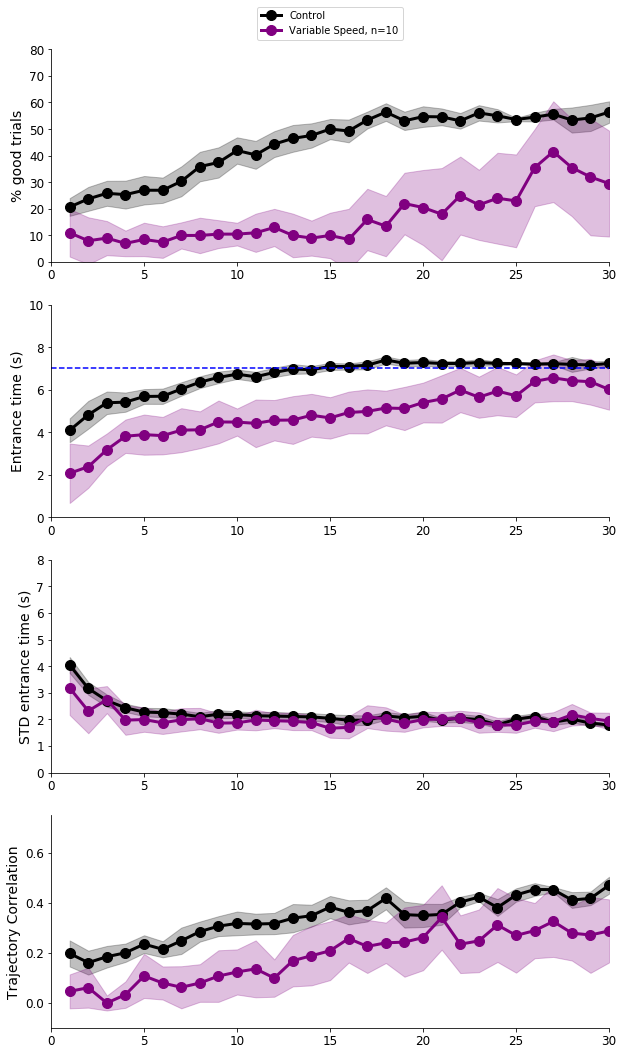

In [11]:
fig

animal lists:
 ['Rat077', 'Rat078', 'Rat084', 'Rat085', 'Rat088', 'Rat091', 'Rat095', 'Rat096', 'Rat098', 'Rat103', 'Rat104', 'Rat110', 'Rat113', 'Rat120', 'Rat137', 'Rat138', 'Rat139', 'Rat140', 'Rat149', 'Rat150', 'Rat151', 'Rat152', 'Rat161', 'Rat162', 'Rat163', 'Rat164', 'Rat165', 'Rat166', 'Rat215', 'Rat216', 'Rat217', 'Rat218', 'Rat219', 'Rat220', 'Rat221', 'Rat222', 'Rat223', 'Rat224', 'Rat225', 'Rat226', 'Rat227', 'Rat228', 'Rat229', 'Rat230', 'Rat232', 'Rat246', 'Rat247', 'Rat248', 'Rat249', 'Rat250', 'Rat251', 'Rat252', 'Rat253', 'Rat254', 'Rat255', 'Rat256', 'Rat257', 'Rat258', 'Rat259', 'Rat260', 'Rat261', 'Rat262', 'Rat263', 'Rat264', 'Rat265'] 
 ['Rat071', 'Rat072', 'Rat073', 'Rat074']
Estimated time to run sample size control<3.77827906049788s
number of removed subsets:  46.0


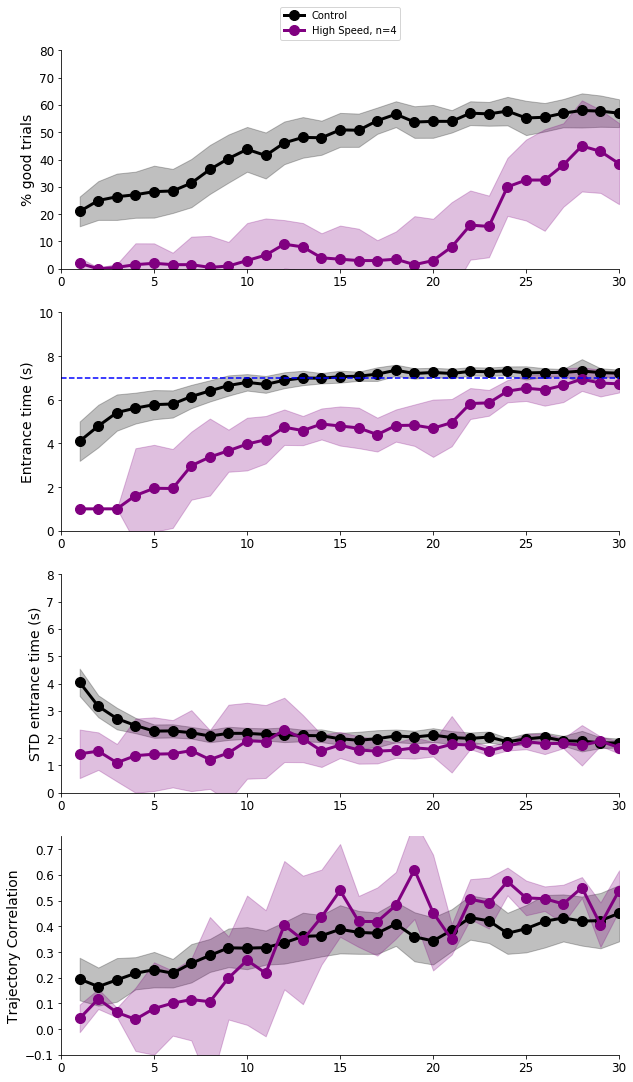

In [17]:
if "__file__" not in dir():

    profile1={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Control']
             }
    profile2={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':['20','25','30','35'],
             'Speed':['20','25','30','35'],
             'Tag':['Control']
             }
    animalList1=batch_get_animal_list(root,profile1)
    animalList2=batch_get_animal_list(root,profile2)
    #animalList1=[ 'Rat085', 'Rat095']
    ## ok late DLS Histo
    #animalList2= ['Rat118', 'Rat119', 'Rat133', 'Rat134']

    groups={
        "group1":(cm.Greys,"black",animalList1,profile1),
        "group2":(cm.Purples ,"purple"  ,animalList2,profile2),
        }

    print("animal lists:\n",animalList1,'\n',animalList2)    
    
    
    TaskParamToPlot=["% good trials","median entrance time (sec)",
                     "standard deviation of entrance time","Trajectory Correlation"]
    n_iteration=1e3
    stop_dayPlot =30
    fullLegend=False
    fig=plt.figure(figsize=(10,18))
    axes=[]
    for i in range(4):
        axes.append(fig.add_subplot(4,1,i+1))
    
    a=plot_mean_animals(root,groups,axes=axes,n_iteration=n_iteration,
                        parameter={},redo=False,stop_dayPlot=stop_dayPlot,TaskParamToPlot=TaskParamToPlot,fullLegend=False,title='')
    print("number of removed subsets: ",n_iteration-a[3].iterN)
    axes[0].legend(['Control', f'High Speed, n={len(animalList2)}'],bbox_to_anchor=(0.5, 1.2), loc=9, borderaxespad=0,ncol=1)
    
#     fig.savefig("/home/david/Mostafa/PhD/FENS2018/ctrl_high.svg",format='svg')

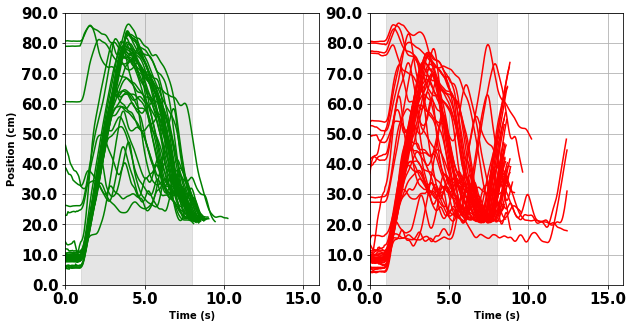

In [107]:
session='Rat073_2016_11_04_10_20'
data=Data(root,session[:6],session,redoPreprocess=False)
data.position_correction()
onlyGood=False
plt.figure(figsize=(10,5))
posDict=data.position
time=data.rawTime #align on camera
goodAx=plt.subplot(121)
badAx =plt.subplot(122)
for trial in posDict:
    ax=goodAx
    color="green"
    if trial not in data.goodTrials:
        color="red"
        ax=badAx

    ax.plot(time[trial][:data.stopFrame[trial]],posDict[trial][:data.stopFrame[trial]],color=color)

for i in [goodAx,badAx]:
    plt.sca(i)
    plt.xlim([0,16])
    plt.ylim([0,90])
    plt.grid()
    plt.ylabel("Position (cm)",fontsize=10,weight='bold')
    plt.xlabel("Time (s)",fontsize=10,weight='bold')
    i.set_xticklabels(i.get_xticks(), weight='bold')
    i.set_yticklabels(i.get_yticks(), weight='bold')
    plt.axvspan(data.cameraToTreadmillDelay,data.cameraToTreadmillDelay+np.median(data.goalTime),alpha=0.2,color="grey")

plt.ylabel("",fontsize=10,weight='bold')
# plt.savefig("/home/david/Mostafa/PhD/PhdDays2017/Poster/%s.png"%session)
_save("Rat073D179")
plt.show()

### Early Lesion Data

animal lists:
 ['Rat077', 'Rat078', 'Rat084', 'Rat085', 'Rat088', 'Rat091', 'Rat095', 'Rat096', 'Rat098', 'Rat103', 'Rat104', 'Rat110', 'Rat113', 'Rat120', 'Rat137', 'Rat138', 'Rat139', 'Rat140', 'Rat149', 'Rat150', 'Rat151', 'Rat152', 'Rat161', 'Rat162', 'Rat163', 'Rat164', 'Rat165', 'Rat166', 'Rat215', 'Rat216', 'Rat217', 'Rat218', 'Rat219', 'Rat220', 'Rat221', 'Rat222', 'Rat223', 'Rat224', 'Rat225', 'Rat226', 'Rat227', 'Rat228', 'Rat229', 'Rat230', 'Rat232', 'Rat246', 'Rat247', 'Rat248'] 
 ['Rat082', 'Rat115', 'Rat117', 'Rat201', 'Rat202', 'Rat204', 'Rat203']
Estimated time to run sample size control<7.070228000884526s
number of removed subsets:  1.0


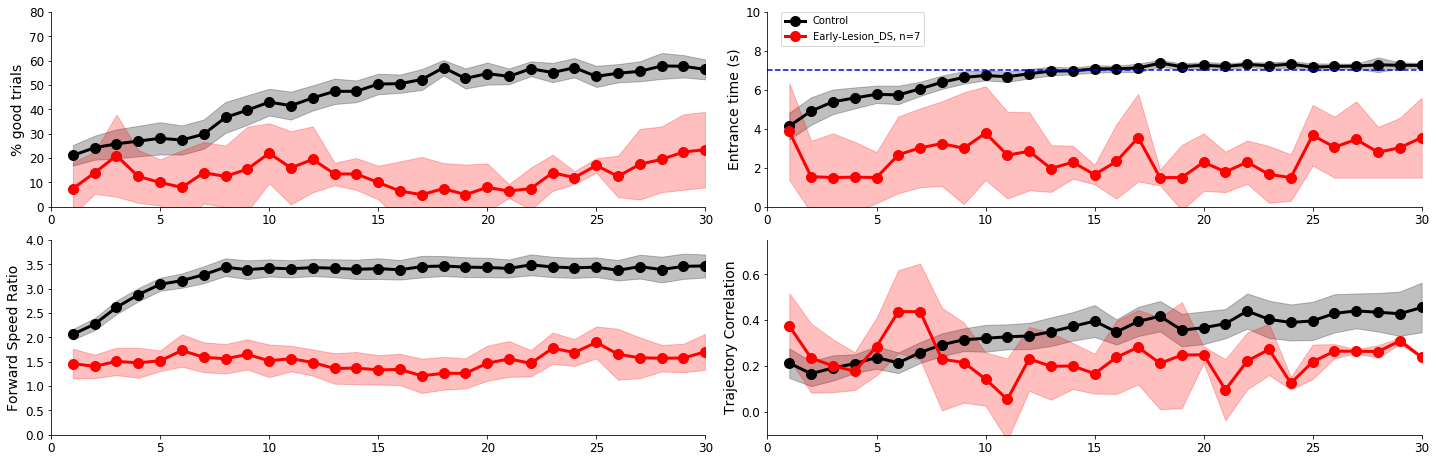

In [9]:
if "__file__" not in dir():

    profile1={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Control']
             }
    profile2={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Early-Lesion_DS']
             }
    animalList1=batch_get_animal_list(root,profile1)
    animalList2=batch_get_animal_list(root,profile2)
    
    ## ok Histo
    animalList2= ['Rat082', 'Rat115', 'Rat117', 'Rat201','Rat202','Rat204','Rat203']

    groups={
        "group1":(cm.Greys,"black",animalList1,profile1),
        "group2":(cm.Reds ,"red"  ,animalList2,profile2),
        }

    print("animal lists:\n",animalList1,'\n',animalList2)    
    
    
    TaskParamToPlot=["% good trials","median entrance time (sec)",
                     "Forward Speed Vs TreadmillSpeed","Trajectory Correlation"]
    n_iteration=1e3
    stop_dayPlot =30
    fullLegend=False
    fig=plt.figure(figsize=(20,7))
    axes=[]
    for i in range(4):
        axes.append(fig.add_subplot(2,2,i+1))
    
    a=plot_mean_animals(root,groups,axes=axes,n_iteration=n_iteration,
                        parameter={},redo=False,stop_dayPlot=stop_dayPlot,TaskParamToPlot=TaskParamToPlot,fullLegend=False,title='')
    print("number of removed subsets: ",n_iteration-a[3].iterN)
    
#     fig.savefig("/home/david/Mostafa/PhD/ThesisMonitoringCommittee/presentation/pics/lesion_ds.svg",format='svg')

In [12]:
if "__file__" not in dir():

    profile1={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Control']
             }
    profile2={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Early-Lesion_DLS']
             }
    animalList1=batch_get_animal_list(root,profile1)
    animalList2=batch_get_animal_list(root,profile2)
    
    ## ok Histo
    animalList2= ['Rat097', 'Rat099', 'Rat100', 'Rat114','Rat116','Rat081']

    groups={
        "group1":(cm.Greys,"black",animalList1,profile1),
        "group2":(cm.Reds ,"red"  ,animalList2,profile2),
        }

    print("animal lists:\n",animalList1,'\n',animalList2)    
    
    
    TaskParamToPlot=["% good trials","median entrance time (sec)",
                     "Forward Speed Vs TreadmillSpeed","Trajectory Correlation"]
    n_iteration=1e3
    stop_dayPlot =30
    fullLegend=False
    fig=plt.figure(figsize=(20,7))
    axes=[]
    for i in range(4):
        axes.append(fig.add_subplot(2,2,i+1))
    
    a=plot_mean_animals(root,groups,axes=axes,n_iteration=n_iteration,
                        parameter={},redo=False,stop_dayPlot=stop_dayPlot,TaskParamToPlot=TaskParamToPlot,fullLegend=False,title='')
    axes[1].legend(loc=4)
    print("number of removed subsets: ",n_iteration-a[3].iterN)
    
#     fig.savefig("/home/david/Mostafa/PhD/ThesisMonitoringCommittee/presentation/pics/lesion_dls.svg",format='svg')

animal lists:
 ['Rat077', 'Rat078', 'Rat084', 'Rat085', 'Rat088', 'Rat091', 'Rat095', 'Rat096', 'Rat098', 'Rat103', 'Rat104', 'Rat110', 'Rat113', 'Rat120', 'Rat137', 'Rat138', 'Rat139', 'Rat140', 'Rat149', 'Rat150', 'Rat151', 'Rat152', 'Rat161', 'Rat162', 'Rat163', 'Rat164', 'Rat165', 'Rat166', 'Rat215', 'Rat216', 'Rat217', 'Rat218', 'Rat219', 'Rat220', 'Rat221', 'Rat222', 'Rat223', 'Rat224', 'Rat225', 'Rat226', 'Rat227', 'Rat228', 'Rat229', 'Rat230', 'Rat232', 'Rat246', 'Rat247', 'Rat248'] 
 ['Rat097', 'Rat099', 'Rat100', 'Rat114', 'Rat116', 'Rat081']
Estimated time to run sample size control<3.6749129994859686s
NameError('Rat097 :pickle not complete, computing again...',)
NameError('Rat099 :pickle not complete, computing again...',)
NameError('Rat100 :pickle not complete, computing again...',)
NameError('Rat081 :pickle not complete, computing again...',)
number of removed subsets:  0.0


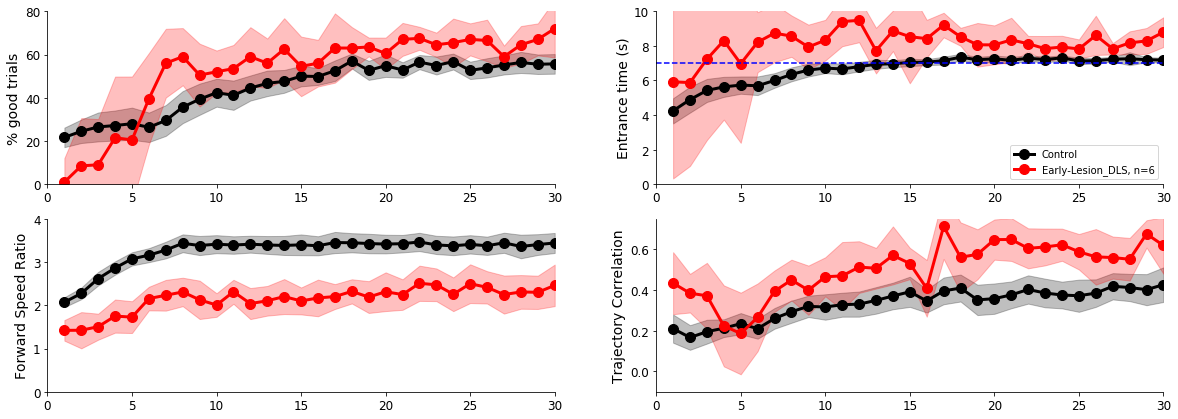

In [13]:
fig

In [14]:
if "__file__" not in dir():

    profile1={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Control']
             }
    profile2={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Early-Lesion_DMS']
             }
    animalList1=batch_get_animal_list(root,profile1)
    animalList2=batch_get_animal_list(root,profile2)
    
    ## ok Histo
    animalList2= ['Rat101', 'Rat102', 'Rat118', 'Rat119', 'Rat133']

    groups={
        "group1":(cm.Greys,"black",animalList1,profile1),
        "group2":(cm.Reds ,"red"  ,animalList2,profile2),
        }

    print("animal lists:\n",animalList1,'\n',animalList2)    
    
    
    TaskParamToPlot=["% good trials","median entrance time (sec)",
                     "Forward Speed Vs TreadmillSpeed","Trajectory Correlation"]
    n_iteration=1e3
    stop_dayPlot =30
    fullLegend=False
    fig=plt.figure(figsize=(20,7))
    axes=[]
    for i in range(4):
        axes.append(fig.add_subplot(2,2,i+1))
    
    a=plot_mean_animals(root,groups,axes=axes,n_iteration=n_iteration,
                        parameter={},redo=False,stop_dayPlot=stop_dayPlot,TaskParamToPlot=TaskParamToPlot,fullLegend=False,title='')
    axes[1].legend(loc=4)
    print("number of removed subsets: ",n_iteration-a[3].iterN)
    
#     fig.savefig("/home/david/Mostafa/PhD/ThesisMonitoringCommittee/presentation/pics/lesion_dms.svg",format='svg')

animal lists:
 ['Rat077', 'Rat078', 'Rat084', 'Rat085', 'Rat088', 'Rat091', 'Rat095', 'Rat096', 'Rat098', 'Rat103', 'Rat104', 'Rat110', 'Rat113', 'Rat120', 'Rat137', 'Rat138', 'Rat139', 'Rat140', 'Rat149', 'Rat150', 'Rat151', 'Rat152', 'Rat161', 'Rat162', 'Rat163', 'Rat164', 'Rat165', 'Rat166', 'Rat215', 'Rat216', 'Rat217', 'Rat218', 'Rat219', 'Rat220', 'Rat221', 'Rat222', 'Rat223', 'Rat224', 'Rat225', 'Rat226', 'Rat227', 'Rat228', 'Rat229', 'Rat230', 'Rat232', 'Rat246', 'Rat247', 'Rat248'] 
 ['Rat101', 'Rat102', 'Rat118', 'Rat119', 'Rat133']
Estimated time to run sample size control<3.363526999237365s
NameError('Rat101 :pickle not complete, computing again...',)
NameError('Rat102 :pickle not complete, computing again...',)
number of removed subsets:  0.0


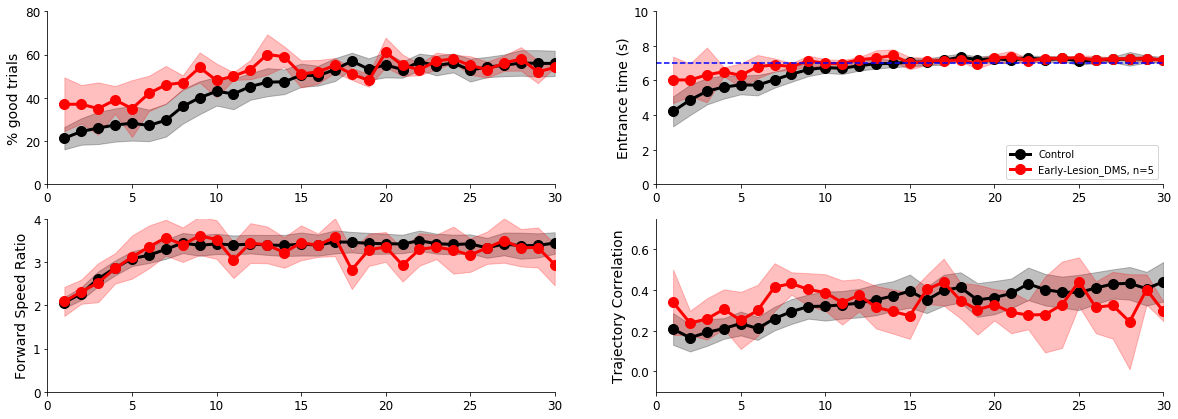

In [15]:
fig

animal lists:
 ['Rat077', 'Rat078', 'Rat084', 'Rat085', 'Rat088', 'Rat091', 'Rat095', 'Rat096', 'Rat098', 'Rat103', 'Rat104', 'Rat110', 'Rat113', 'Rat120', 'Rat137', 'Rat138', 'Rat139', 'Rat140', 'Rat149', 'Rat150', 'Rat151', 'Rat152', 'Rat161', 'Rat162', 'Rat163', 'Rat164', 'Rat165', 'Rat166', 'Rat215', 'Rat216', 'Rat217', 'Rat218', 'Rat219', 'Rat220', 'Rat221', 'Rat222', 'Rat223', 'Rat224', 'Rat225', 'Rat226', 'Rat227', 'Rat228', 'Rat229', 'Rat230', 'Rat232', 'Rat246', 'Rat247', 'Rat248'] 
 ['Rat167', 'Rat168', 'Rat169', 'Rat170', 'Rat171', 'Rat207', 'Rat208', 'Rat209', 'Rat210']
Estimated time to run sample size control<5.779713499578065s
number of removed subsets:  0.0


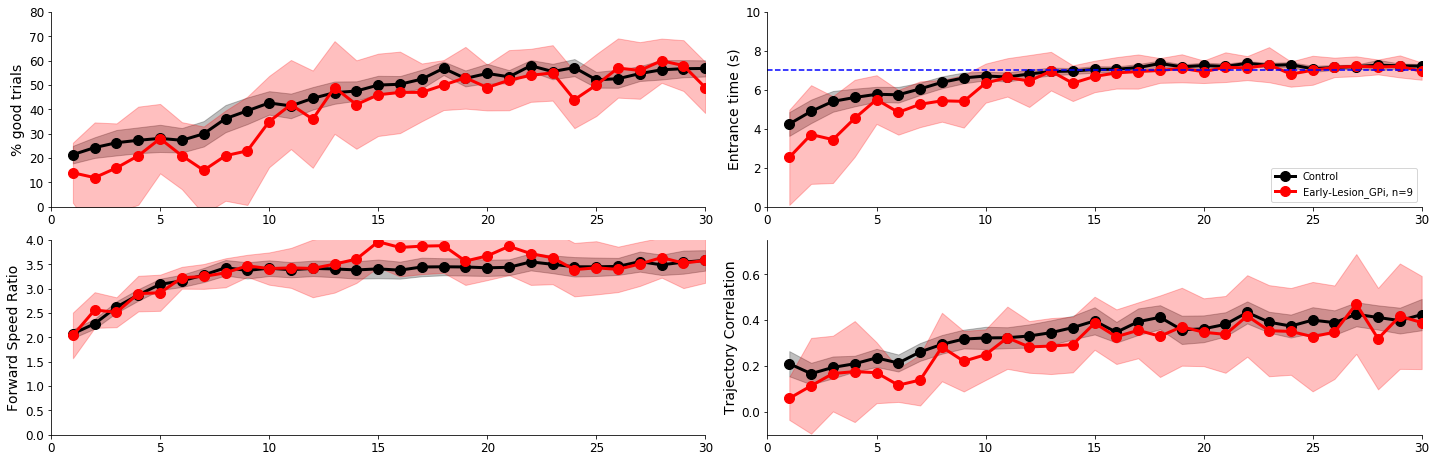

In [18]:
if "__file__" not in dir():

    profile1={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Control']
             }
    profile2={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Early-Lesion_GPi']
             }
    animalList1=batch_get_animal_list(root,profile1)
    animalList2=batch_get_animal_list(root,profile2)
    
    ## ok Histo
    #animalList2= ['Rat118', 'Rat119', 'Rat133', 'Rat134']

    groups={
        "group1":(cm.Greys,"black",animalList1,profile1),
        "group2":(cm.Reds ,"red"  ,animalList2,profile2),
        }

    print("animal lists:\n",animalList1,'\n',animalList2)    
    
    
    TaskParamToPlot=["% good trials","median entrance time (sec)",
                     "Forward Speed Vs TreadmillSpeed","Trajectory Correlation"]
    n_iteration=1e3
    stop_dayPlot =30
    fullLegend=False
    fig=plt.figure(figsize=(20,7))
    axes=[]
    for i in range(4):
        axes.append(fig.add_subplot(2,2,i+1))
    
    a=plot_mean_animals(root,groups,axes=axes,n_iteration=n_iteration,
                        parameter={},redo=False,stop_dayPlot=stop_dayPlot,TaskParamToPlot=TaskParamToPlot,fullLegend=False,title='')
    axes[1].legend(loc=4)
    print("number of removed subsets: ",n_iteration-a[3].iterN)

#     fig.savefig("/home/david/Mostafa/PhD/ThesisMonitoringCommittee/presentation/pics/lesion_GPi.svg",format='svg')

In [79]:
    TaskParamToPlot=["Run Distance"]
    n_iteration=1e3
    stop_dayPlot =30
    fullLegend=False
    fig=plt.figure(figsize=(10*(stop_dayPlot/30),3.5))
    axes=[fig.add_subplot(111)]
    
    a=plot_mean_animals(root,groups,axes=axes,n_iteration=n_iteration,
                        parameter={},redo=False,stop_dayPlot=stop_dayPlot,TaskParamToPlot=TaskParamToPlot,fullLegend=False,title='')
    axes[0].legend(loc=4)
    print("number of removed subsets: ",n_iteration-a[3].iterN)

#     fig.savefig("/home/david/Mostafa/PhD/ThesisMonitoringCommittee/presentation/pics/lesion_GPi.svg",format='svg')

Estimated time to run sample size control<3.607544465921819s
NameError('Rat124 :pickle not complete, computing again...',)
NameError('Rat131 :pickle not complete, computing again...',)
number of removed subsets:  8.0


### Immobile 

In [88]:
if "__file__" not in dir():

    profile1={'Type':'Good',
             'rewardType':'Progressive',
             'initialSpeed':'10',
             'Speed':'10',
             'Tag':['Control']
             }
    profile2={'Type':'Good',
             'rewardType':'Progressive',
#              'initialSpeed':'10',
#              'Speed':'10',
             'Tag':['ImmobileTreadmill-Control']
             }
    animalList1=batch_get_animal_list(root,profile1)
    animalList2=batch_get_animal_list(root,profile2)
    ## ok late DLS Histo
    #animalList2= ['Rat118', 'Rat119', 'Rat133', 'Rat134']

    groups={
        "group1":(cm.Greys,"black",animalList1,profile1),
        "group2":(cm.Purples ,"purple"  ,animalList2,profile2),
        }

    print("animal lists:\n",animalList1,'\n',animalList2)    
    
    
    TaskParamToPlot=["% good trials","median entrance time (sec)",]
    n_iteration=1e3
    stop_dayPlot =30
    fullLegend=False
    fig=plt.figure(figsize=(10,7))
    axes=[]
    for i in range(2):
        axes.append(fig.add_subplot(2,1,i+1))
    
    a=plot_mean_animals(root,groups,axes=axes,n_iteration=n_iteration,
                        parameter={},redo=False,stop_dayPlot=stop_dayPlot,TaskParamToPlot=TaskParamToPlot,fullLegend=False,title='')
#     axes[-1].legend(loc=4)
    print("number of removed subsets: ",n_iteration-a[3].iterN)
    axes[0].legend(['Control', f'ImmobileTreadmill => Control, n={len(animalList2)}'],bbox_to_anchor=(0.5, 1.2), loc=9, borderaxespad=0,ncol=1)
#     fig.savefig("/home/david/Mostafa/PhD/FENS2018/imm_relearning.svg",format='svg')

animal lists:
 ['Rat077', 'Rat078', 'Rat084', 'Rat085', 'Rat088', 'Rat091', 'Rat095', 'Rat096', 'Rat098', 'Rat103', 'Rat104', 'Rat110', 'Rat113', 'Rat120', 'Rat137', 'Rat138', 'Rat139', 'Rat140', 'Rat149', 'Rat150', 'Rat151', 'Rat152', 'Rat161', 'Rat162', 'Rat163', 'Rat164', 'Rat165', 'Rat166', 'Rat215', 'Rat216', 'Rat217', 'Rat218', 'Rat219', 'Rat220', 'Rat221', 'Rat222', 'Rat223', 'Rat224', 'Rat225', 'Rat226', 'Rat227', 'Rat228', 'Rat229', 'Rat230', 'Rat232', 'Rat246', 'Rat247', 'Rat248', 'Rat249', 'Rat250', 'Rat251', 'Rat252', 'Rat253', 'Rat254', 'Rat255', 'Rat256', 'Rat257', 'Rat258', 'Rat259', 'Rat260', 'Rat261', 'Rat262', 'Rat263', 'Rat264', 'Rat265'] 
 ['Rat121', 'Rat122', 'Rat123', 'Rat124', 'Rat131', 'Rat132']
Estimated time to run sample size control<3.348303958773613s
NameError('Rat124 :pickle not complete, computing again...',)
number of removed subsets:  9.0


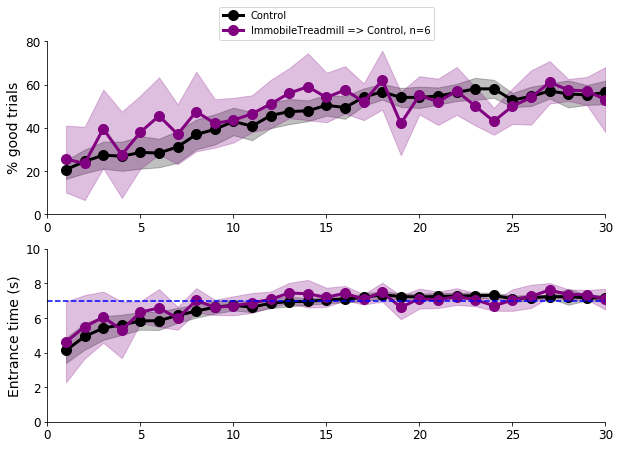

In [87]:
fig

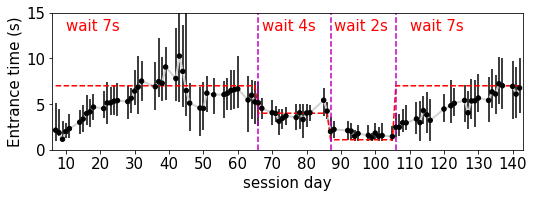

In [92]:
AnimalProfile={'Type':'Good',
     'rewardType':'Progressive',
#      'initialSpeed':['10'],
#      'Speed':'10',
     'Tag':['ImmobileTreadmill','ImmobileTreadmill-GT4','ImmobileTreadmill-GT2','ImmobileTreadmill-BackToGT7']
              }

plot_learningCurves(root,'Rat123',PerfParamToPlot=['percentile entrance time'],profile=AnimalProfile,
                    stop_date='',parameter=defaultParam,redoPreprocess=False,
                    redoStat=False,override=False,plot=True,PrintWarning=False);
fig=plt.gcf();
fig.suptitle('')
ax=plt.gca()
ax.set_title('')
matplotlib.rc('font', **font)
ax.grid('off')
ax.set_ylabel('Entrance time (s)')
ax.text(10,13,'wait 7s',fontdict=font,color='r')
ax.text(67,13,'wait 4s',fontdict=font,color='r')
ax.text(88,13,'wait 2s',fontdict=font,color='r')
ax.text(110,13,'wait 7s',fontdict=font,color='r')
ax.set_ylim([0,15])
# fig.savefig("/home/david/Mostafa/PhD/FENS2018/imm_GT_change.svg",format='svg')

#### signal traces

In [13]:
#reading dat file into an array
duration=1 #sec
offset=26*60+59.197 #sec
fs=2e+4
nchannels=64

# datFile='/data/Rat174/Experiments/Rat174_2018_05_07_14_27/Rat174_2018_05_07_14_27.dat'
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


data=np.fromfile(datFile,dtype=np.int16)
data2=np.reshape(data,(-1,nchannels),order='C')

i=int(offset*fs)
dat=data2[i:i+int(duration*fs),:].copy()
gc.collect()

NameError: name 'nchannels' is not defined

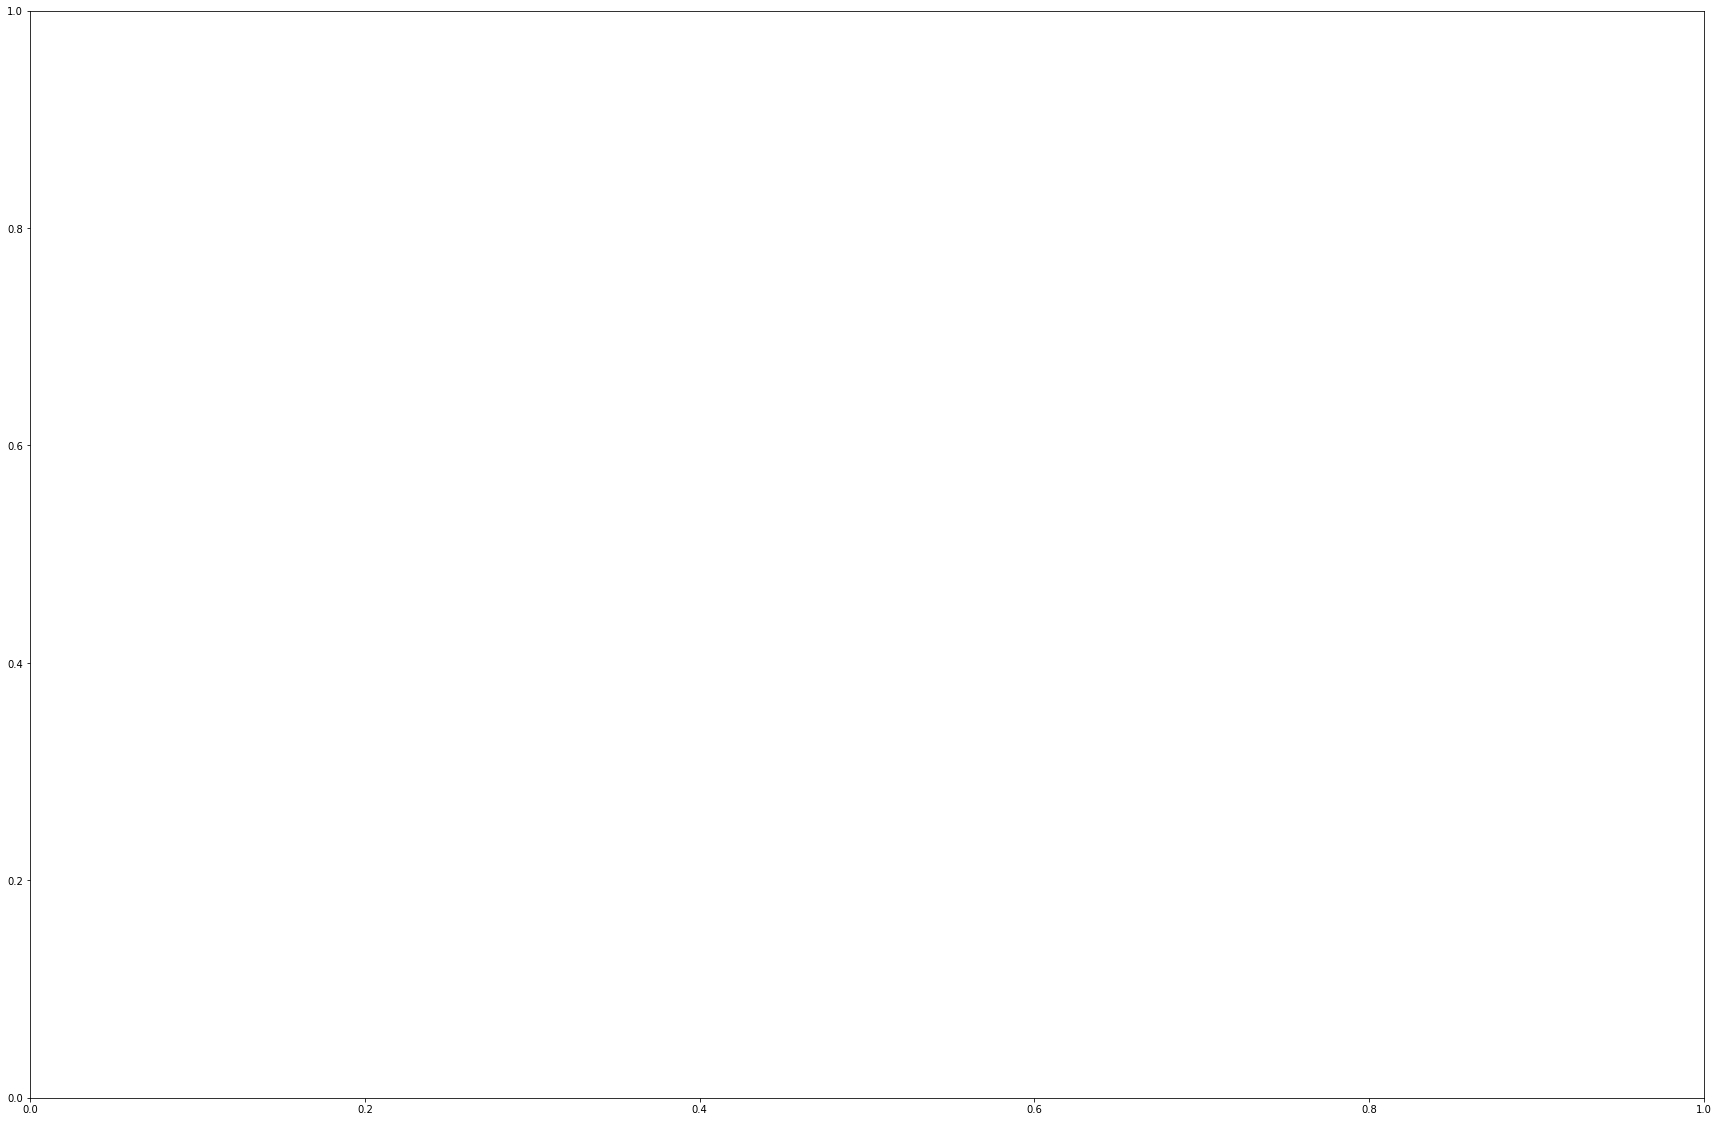

In [89]:
fig=plt.figure(figsize=(30,20))
ax=fig.add_subplot(111)

RANGE=range(36,nchannels-8)
cmap=plt.get_cmap('Set1')

Max=np.median(np.median(np.abs(dat[:,:-2]),axis=1),axis=0)
step=int(8*Max)
t=np.linspace(0,duration,int(fs*duration))
for i in RANGE:
    shift=-abs(i*step)
    ax.plot(t,dat[:,i]+shift,color=cmap.colors[(i-36)//4])

ax.set_xlabel('Time (s)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks([])
ax.grid(axis='x',linewidth=3)
ax.set_xlim([-.001,1.001]);
# fig.savefig("/home/david/Mostafa/PhD/ThesisMonitoringCommittee/presentation/pics/signal_trace.svg",format='svg')